<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/3%EC%A3%BC%EC%B0%A8/10_SVM_%EB%B9%84%EC%84%A0%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
iris=sns.load_dataset('iris')
X=iris.drop('species',axis=1) 
y=iris['species']      

In [2]:
from sklearn.preprocessing import LabelEncoder 

classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values)

In [3]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

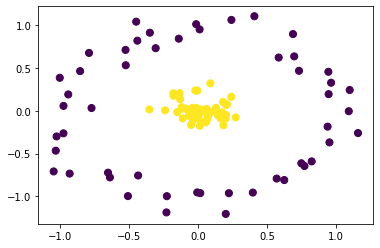

In [4]:
%matplotlib inline    
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100,noise=0.1,factor=0.1)

plt.scatter(X[:,0],X[:,1],c=y,s=50)

In [5]:
import numpy as np
r = np.exp(-(X ** 2).sum(1))


from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(azim=50, elev=30)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [6]:
from sklearn.svm import SVC 

ksvm=SVC(kernel='rbf',C=1.0,gamma=0.2,random_state=42)
ksvm.fit(X_train,y_train)
y_test_pred=ksvm.predict(X_test) 

#Kernel=‘rbf’, gamma=rbf의 설정 파라미터, C=에러허용정도
#gamma 작을 수록 두 데이터의 거리를 실제보다 멀게, 클수록 두 데이터의 거리를 실제보다 가깝게 변환

In [7]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_test_pred))

0.9555555555555556


In [8]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 15]])

In [9]:
print(ksvm.n_support_)

[ 5 14 15]
